In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pickle

## Loading Dataset

In [2]:
df = pd.read_csv('Dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

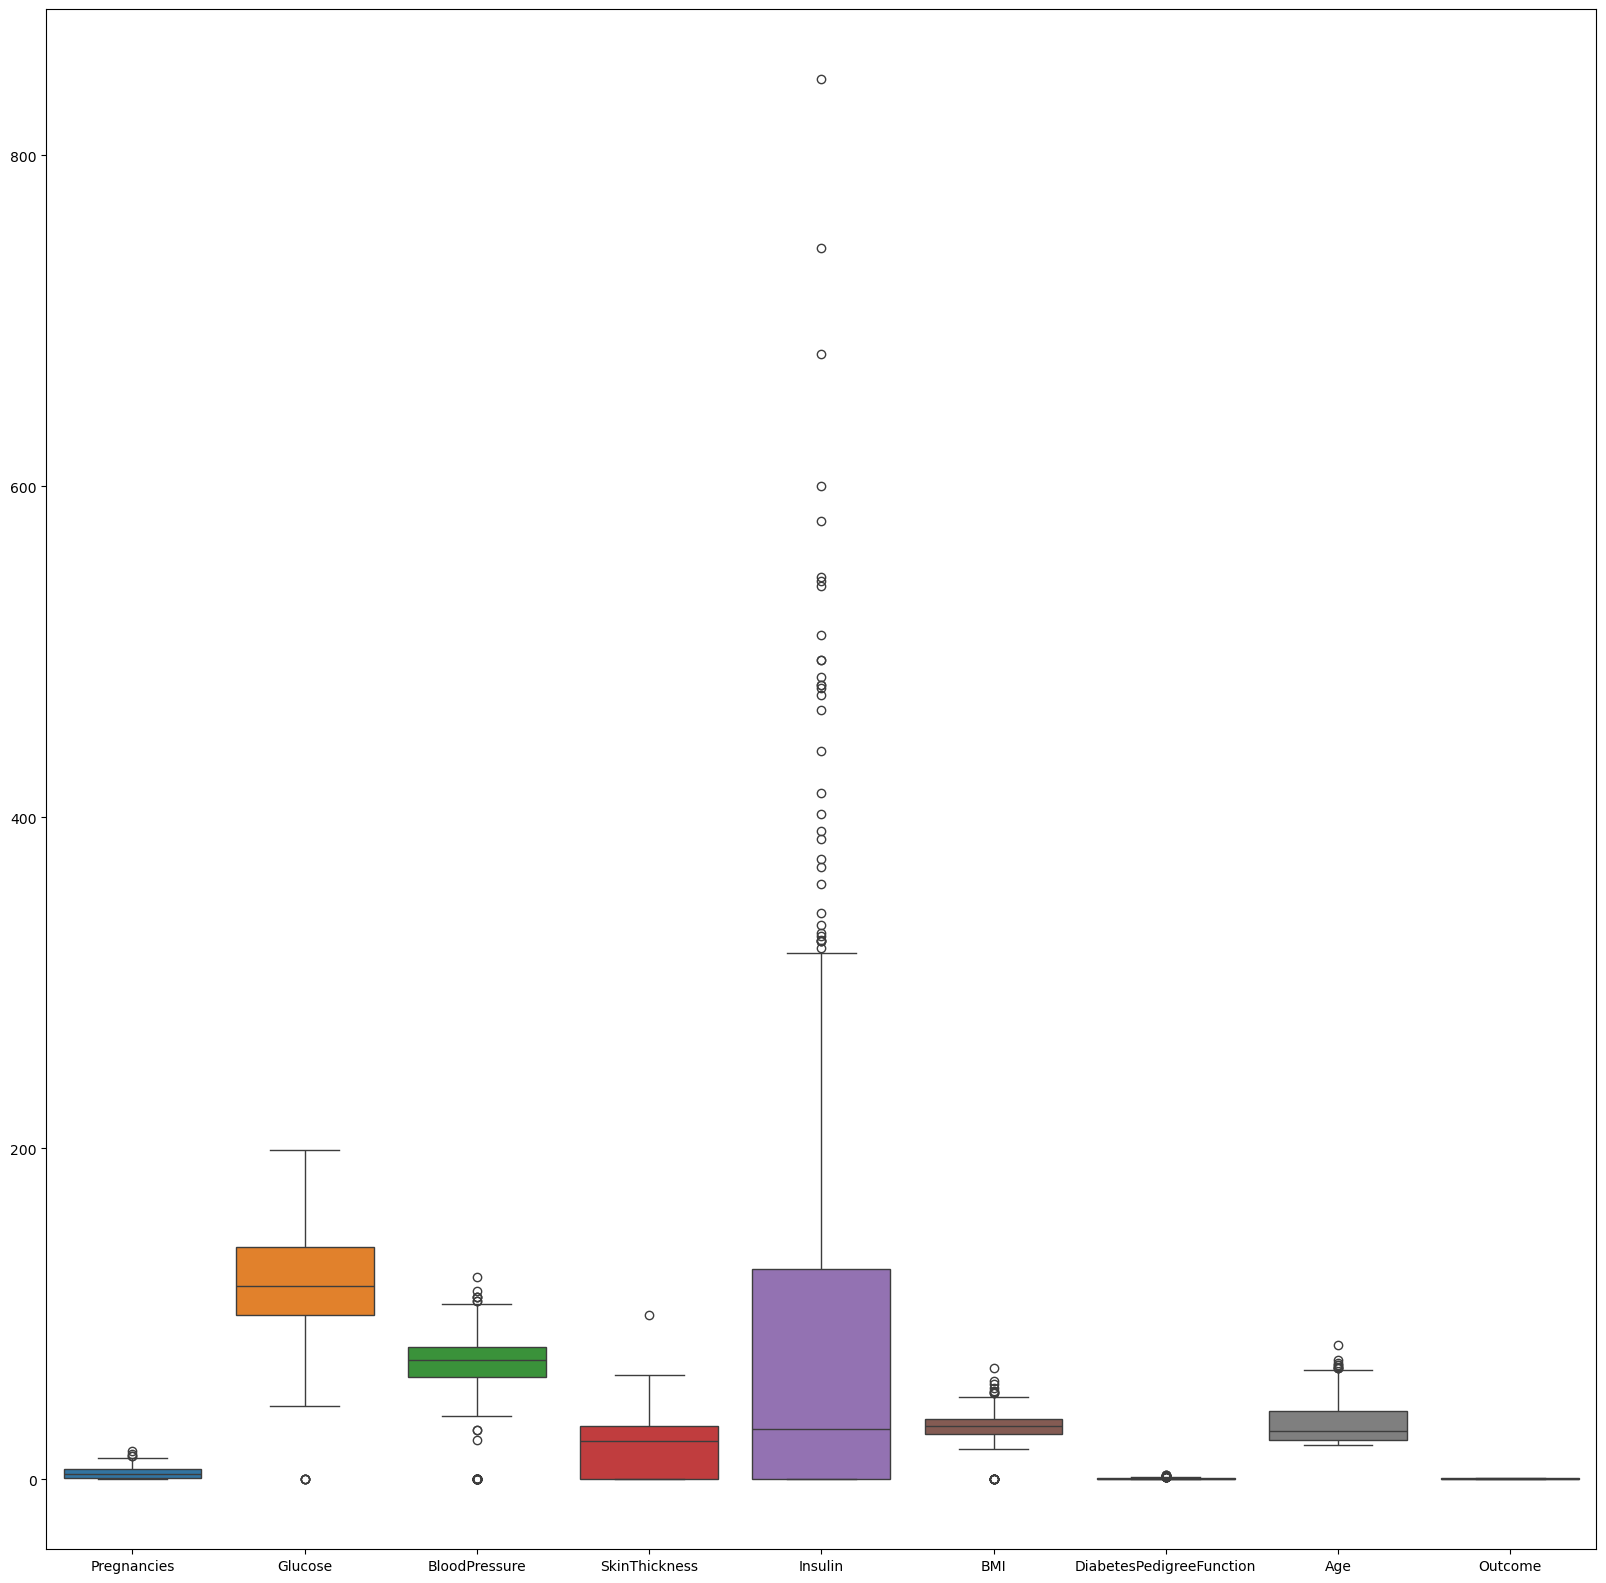

In [9]:
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df,ax = ax)

In [10]:
q = df['BloodPressure'].quantile(0.99)
newdf = df[df['BloodPressure'] < q]

q = newdf['BMI'].quantile(0.99)
newdf = newdf[newdf['BMI'] < q]

q = newdf["Insulin"].quantile(0.95)
newdf = newdf[newdf['Insulin'] < q]

q = newdf['Age'].quantile(0.98)
newdf = newdf[newdf['Age'] < q]

<Axes: >

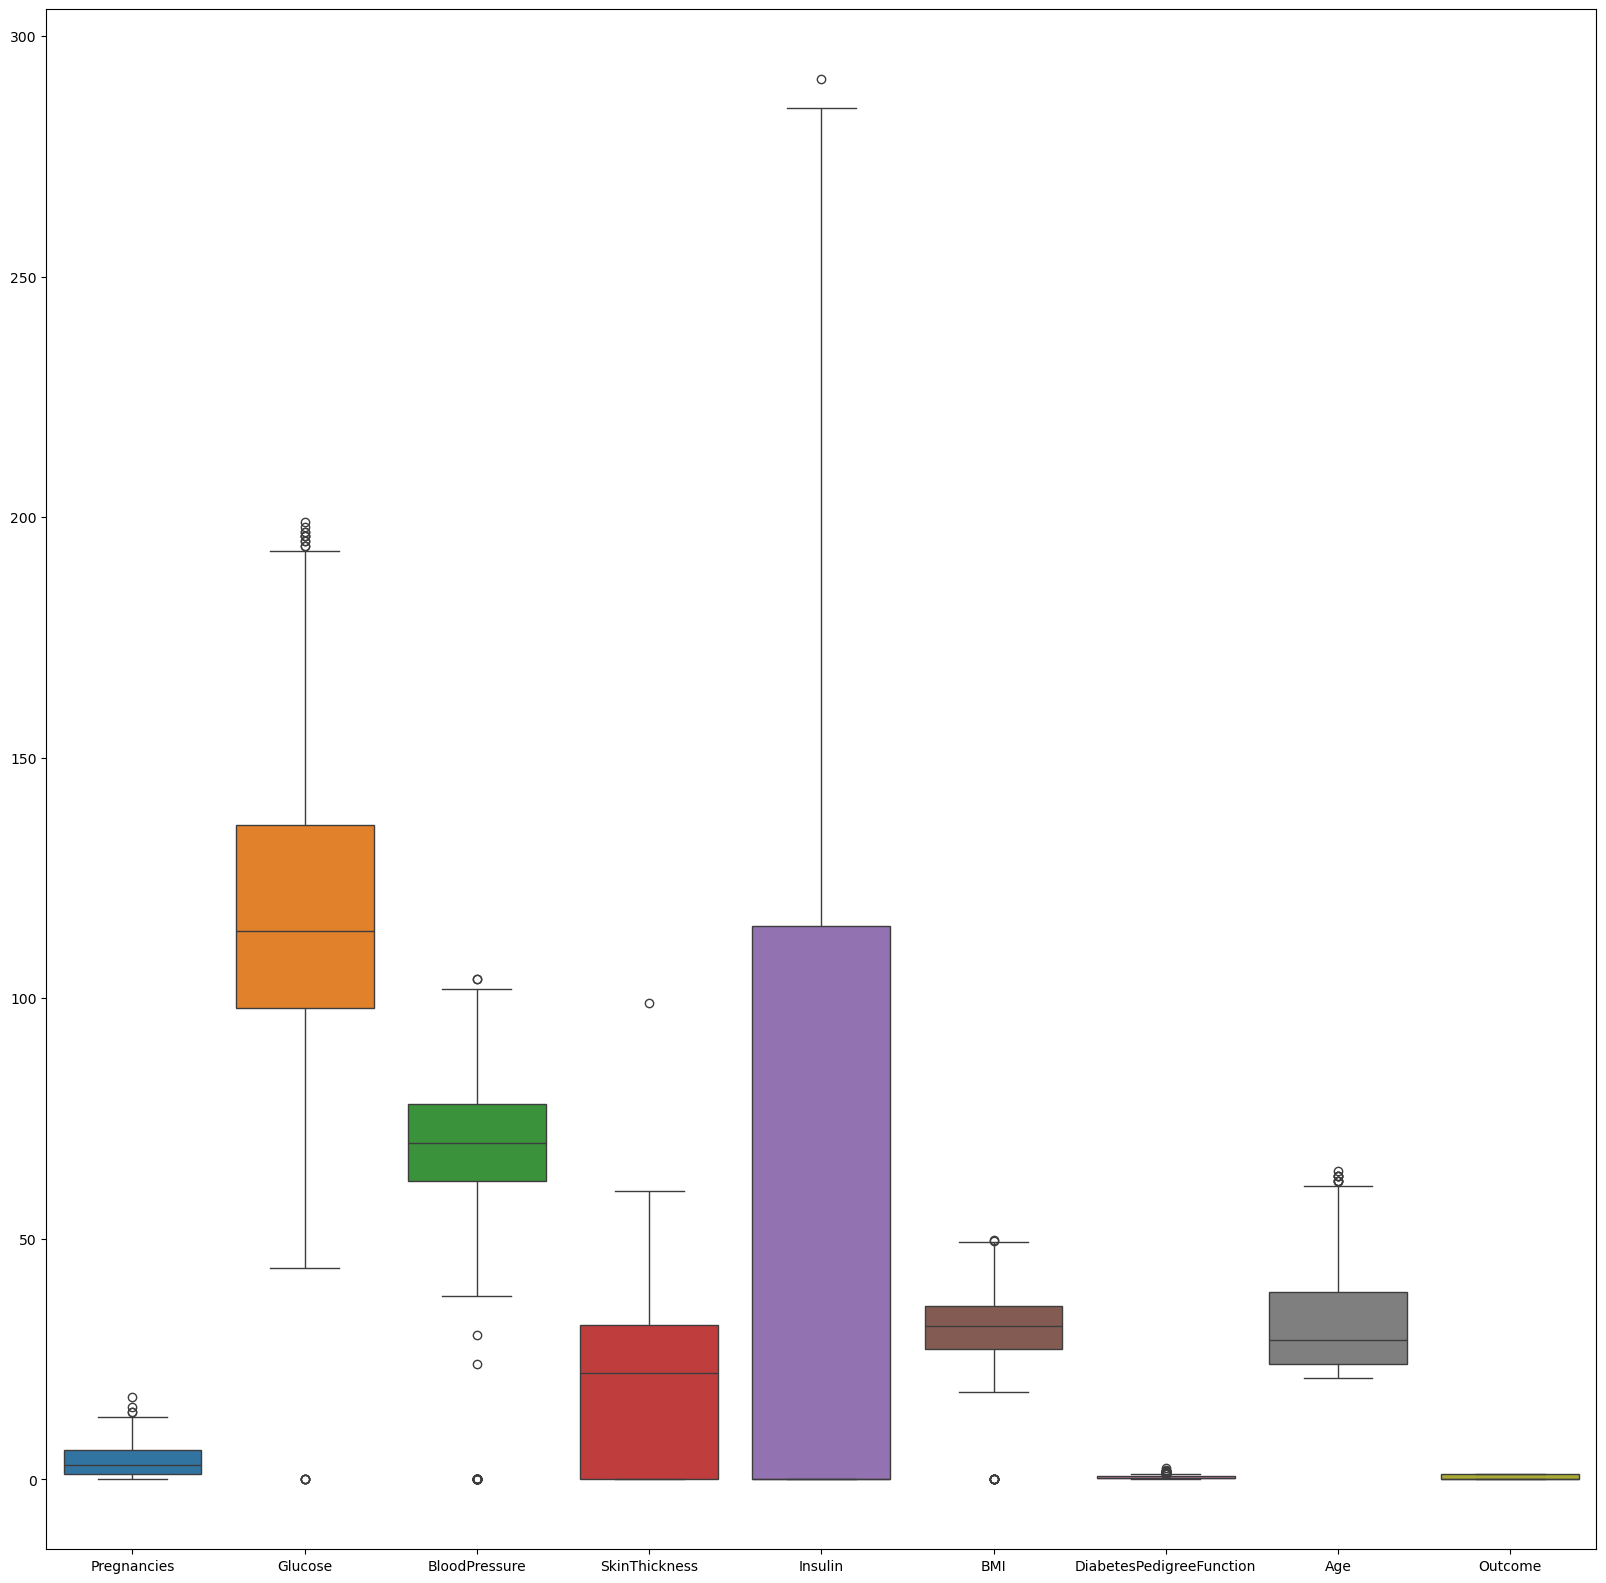

In [11]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = newdf, ax = ax)

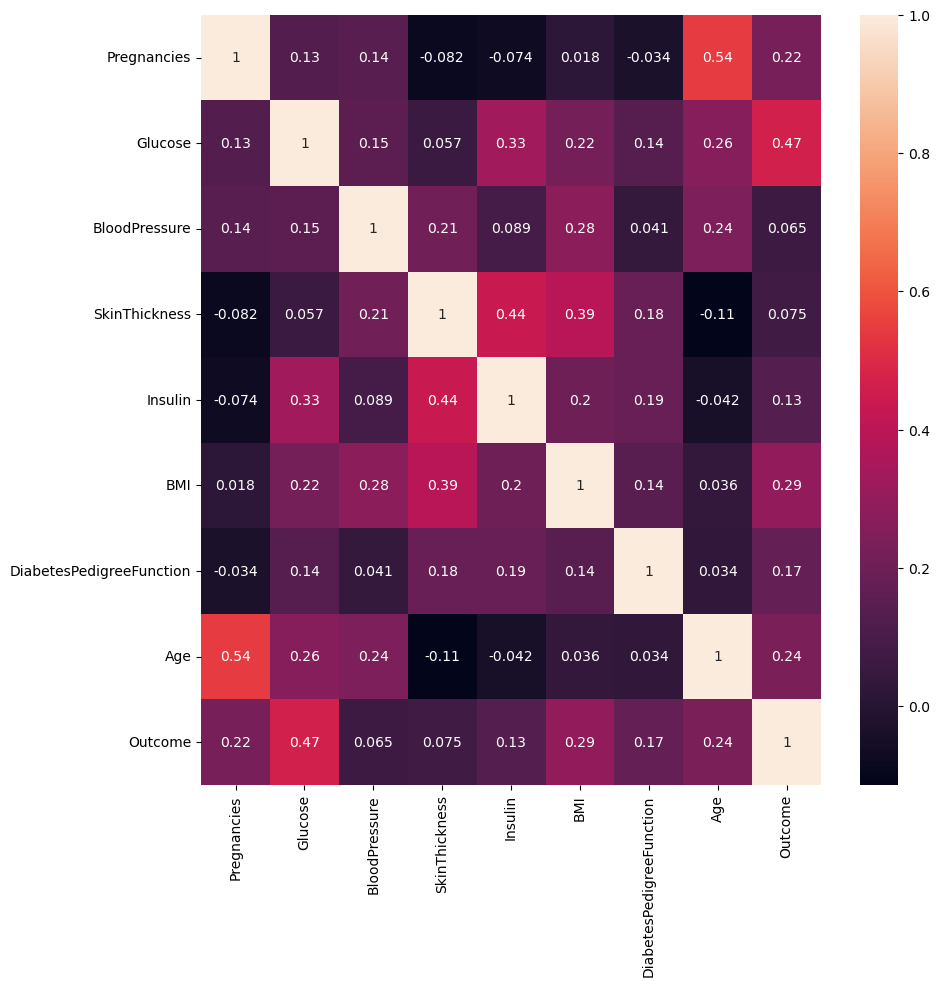

In [12]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(df.corr(), annot = True)
plt.show()

/var/folders/yy/x1rxps2s2kb9r69ysncj7qs00000gn/T/ipykernel_64661/3200867201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

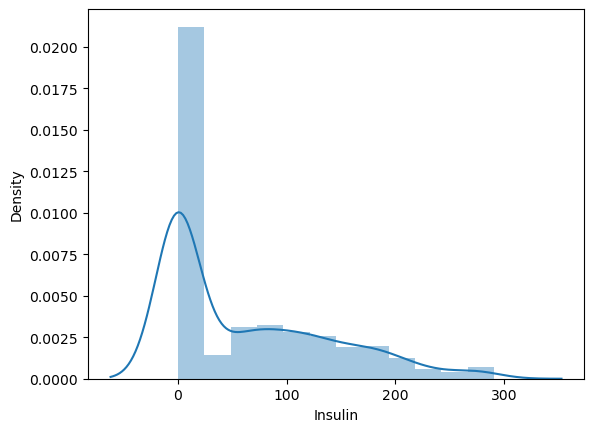

In [13]:
sns.distplot(newdf.Insulin)

In [14]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [15]:
newdf.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


In [29]:
newdf["Insulin"] = newdf["Insulin"].replace(0,newdf["Insulin"].mean())
newdf["BloodPressure"] = newdf["BloodPressure"].replace(0,newdf["BloodPressure"].median())
newdf["SkinThickness"] = newdf["SkinThickness"].replace(0,newdf["SkinThickness"].median())
newdf["BMI"] = newdf["BMI"].replace(0,newdf["BMI"].median())
newdf["Glucose"] = newdf["Glucose"].replace(0,newdf["Glucose"].median())

In [30]:
newdf.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,61.448276,33.60,0.627,50,1
1,1,85,66,29,61.448276,26.60,0.351,31,0
2,8,183,64,22,61.448276,23.30,0.672,32,1
3,1,89,66,23,94.000000,28.10,0.167,21,0
4,0,137,40,35,168.000000,43.10,2.288,33,1
5,5,116,74,22,61.448276,25.60,0.201,30,0
6,3,78,50,32,88.000000,31.00,0.248,26,1
7,10,115,70,22,61.448276,35.30,0.134,29,0
9,8,125,96,22,61.448276,31.95,0.232,54,1
10,4,110,92,22,61.448276,37.60,0.191,30,0


In [20]:
newdf.Insulin[newdf["Insulin"]== 0].value_counts()

Series([], Name: count, dtype: int64)

## Train Test Split

In [21]:
x = newdf.drop(columns = "Outcome")
y = newdf["Outcome"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

## Standardization

In [37]:
scaler = StandardScaler()

In [38]:
x_scaled = scaler.fit_transform(x_train)

In [39]:
x_test_scaled = scaler.fit_transform(x_test)

## Model Building

In [40]:
model = LogisticRegression()

In [41]:
model.fit(x_scaled,y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(x_test_scaled)

In [43]:
accuracy = accuracy_score(y_test,y_pred)

In [44]:
accuracy

0.7857142857142857

## Saving the model and scaler

In [47]:
model_name = "diabetes_model.pkl"

with open(model_name,'wb') as file:
    pickle.dump(model,file)

print(f"Model is saved as {model_name}")

Model is saved as diabetes_model.pkl


In [ ]:
scaler_name = "scaler.pkl"

with open(scaler_name,"wb") as file: